In [1]:
# VISUAL C++, cmake- install in local machine
# pip install cmake
# pip install dlib
# pip install face_recognition

## Import the Modules

In [2]:
# Import required libraries
import os
import cv2
import winsound  # For alarm sound (Windows)
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Suppress pkg_resources warning before importing face_recognition
import warnings
warnings.filterwarnings("ignore", message="pkg_resources is deprecated as an API")

import face_recognition

# Optional: Ignore other user warnings
warnings.filterwarnings('ignore', category=UserWarning)


## Highlight Facial Points in Image

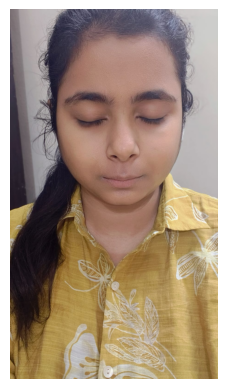

✅ Found 1 face(s) in the image.
✅ Face encodings extracted successfully.


In [3]:
# ---- Load and display image ----
image_path = 'Image2.jpg'   # Change this to your actual image path
if not os.path.exists(image_path):
    print(f"❌ Error: File '{image_path}' not found!")
else:
    # Open image using PIL
    image = Image.open(image_path)

    # Display using matplotlib
    plt.axis('off')
    plt.imshow(image)
    plt.show()

# ---- Example Face Encoding (optional test) ----
# This part ensures face_recognition works fine.
if os.path.exists(image_path):
    img = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(img)
    print(f"✅ Found {len(face_locations)} face(s) in the image.")

    if len(face_locations) > 0:
        face_encodings = face_recognition.face_encodings(img, face_locations)
        print("✅ Face encodings extracted successfully.")

In [4]:
def highlight_facial_points(image_path):
    #load the image
    image_bgr = cv2.imread(image_path)
    #convert from bgr to rgb
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    #detect faces in the image
    face_locations = face_recognition.face_locations(image_rgb, model='cnn')

    for face_location in face_locations:
        # get facial landmarks
        landmarks = face_recognition.face_landmarks(image_rgb, [face_location])[0]

        for landmark_type, landmark_points in landmarks.items():
            for (x, y) in landmark_points:
                cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), 3)
    # plot the image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

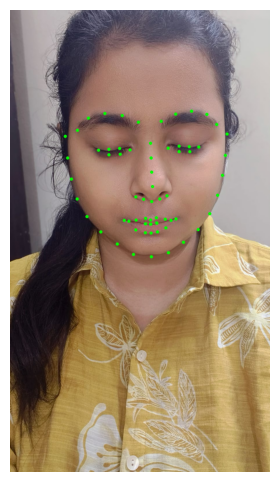

In [5]:
highlight_facial_points(image_path)

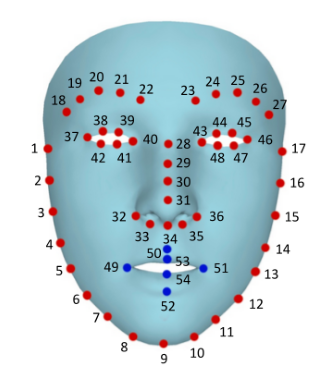

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('land_conf.png')
plt.imshow(img)
plt.axis('off')
plt.show()


In [7]:
# calculate eye aspect ratio
def eye_aspect_ratio(eye):
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A+B) / (2.0 * C)
    return ear

#calculate mouth aspect ratio:
def mouth_ratio(mouth):
    A = distance.euclidean(mouth[2], mouth[10])
    B = distance.euclidean(mouth[4], mouth[8])
    C = distance.euclidean(mouth[0], mouth[6])
    mar = (A+B) / (2.0 * C)
    return mar

In [8]:
def process_image(frame):
    # define thresholds
    EYE_AR_THRESH = 0.25
    MOUTH_AR_THRESH = 0.6

    if frame is None:
        raise ValueError('Image is not found or unable to open')

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # find all face locations
    face_locations = face_recognition.face_locations(rgb_frame)

    # initiate flags
    eye_flag = False
    mouth_flag = False

    for face_location in face_locations:
        # extract facial landmarks
        landmarks = face_recognition.face_landmarks(rgb_frame, [face_location])[0]

        # extract eye and mouth coordinates
        left_eye = np.array(landmarks['left_eye'])
        right_eye = np.array(landmarks['right_eye'])
        mouth = np.array(landmarks['bottom_lip'])
        
        # calculate EAR (Eye Aspect Ratio) and MAR (Mouth Aspect Ratio)
        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)
        
        # check if eyes are closed
        if ear < EYE_AR_THRESH:
            eye_flag = True
        
        # check if yawning
        if mar > MOUTH_AR_THRESH:
            mouth_flag = True

    return eye_flag, mouth_flag



In [9]:
import numpy as np
import cv2
import face_recognition

def eye_aspect_ratio(eye):
    A = np.linalg.norm(eye[1] - eye[5])
    B = np.linalg.norm(eye[2] - eye[4])
    C = np.linalg.norm(eye[0] - eye[3])
    ear = (A + B) / (2.0 * C)
    return ear


def mouth_aspect_ratio(mouth):
    A = np.linalg.norm(mouth[2] - mouth[10])
    B = np.linalg.norm(mouth[4] - mouth[8])
    C = np.linalg.norm(mouth[0] - mouth[6])
    mar = (A + B) / (2.0 * C)
    return mar


def process_image(frame):
    EYE_AR_THRESH = 0.25
    MOUTH_AR_THRESH = 0.6

    if frame is None:
        raise ValueError("Image is not found or unable to open")

    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    face_locations = face_recognition.face_locations(rgb_frame)

    eye_flag = False
    mouth_flag = False

    for face_location in face_locations:
        landmarks = face_recognition.face_landmarks(rgb_frame, [face_location])[0]

        left_eye = np.array(landmarks["left_eye"])
        right_eye = np.array(landmarks["right_eye"])
        mouth = np.array(landmarks["bottom_lip"])

        left_ear = eye_aspect_ratio(left_eye)
        right_ear = eye_aspect_ratio(right_eye)
        ear = (left_ear + right_ear) / 2.0
        mar = mouth_aspect_ratio(mouth)

        if ear < EYE_AR_THRESH:
            eye_flag = True

        if mar > MOUTH_AR_THRESH:
            mouth_flag = True

    return eye_flag, mouth_flag


In [10]:
img = cv2.imread(image_path)
eye_flag, mouth_flag = process_image(img)
print("Eyes closed:", eye_flag)
print("Yawning:", mouth_flag)



Eyes closed: True
Yawning: False


## Real Time Drowsiness Detection

In [11]:

video_cap = cv2.VideoCapture(0) #for getting frames from the webcom

count = score = 0

while True:
    success, image = video_cap.read()
    if not success:
        break
    
    image = cv2.resize(image, (800, 500))
    
    count += 1
    #process every nth frame
    n = 5
    if count % n == 0:
        eye_flag, mouth_flag = process_image(image)
        #if any flag is true, increment the score
        if eye_flag or mouth_flag:
            score += 1
        else:
            score -= 1
            if score < 0:
                score = 0
    # write the score values at bottom left of the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    text_x = 10
    text_y = image.shape[0] - 10
    text = f"Score: {score}"
    cv2.putText(image, text, (text_x, text_y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)
    
    if score >= 5:
        text_x = image.shape[1] - 130
        text_y = 40
        text = "Drowsy"
        cv2.putText(image, text, (text_x, text_y), font, 1, (0, 0, 255), 2, cv2.LINE_AA)

        # Play a short alarm sound
        winsound.Beep(1000, 800)  # (frequency, duration in ms)
    
    cv2.imshow('drowsiness detection', image)
    #exit if any key is pressed
    if cv2.waitKey(1) & 0xFF != 255:
        break

video_cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 